In [1]:
%%time
%matplotlib inline
import importlib
import new_import  
importlib.reload(new_import)
from new_import import *

CPU times: user 8.49 s, sys: 6.09 s, total: 14.6 s
Wall time: 8.51 s


In [2]:
cluster, client = notebook_utils.initialize_dask(use_gateway=True, workers=(1,10))
# Khai báo 1 Datacube là dc
dc = datacube.Datacube()
client

Starting new cluster.


In [3]:
date_range = ('2022-09-01', '2023-10-01')
longtitude_range = (105.5, 106.4)
latitude_range = (9.2, 10.0) 

coordinates = (longtitude_range, latitude_range)

In [4]:
dsvh, dsvv = load_data_sen1(dc, date_range, coordinates)
data_sen2 = load_data_sen2(dc, date_range, coordinates)
notebook_utils.heading(notebook_utils.xarray_object_size(data_sen2))
display(data_sen2)

<xarray.Dataset>
Dimensions:      (time: 33, y: 8874, x: 9902)
Coordinates:
  * time         (time) datetime64[ns] 2022-09-06T22:46:14.500000 ... 2023-09...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
Data variables:
    vv           (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    vh           (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

No datasets require offset correction
The valid_data_mask and scale (no offset) have been applied to the reflectance bands


<xarray.Dataset>
Dimensions:      (time: 151, y: 8874, x: 9902)
Coordinates:
  * time         (time) datetime64[ns] 2022-09-02T03:35:23.960000 ... 2023-09...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
Data variables:
    red          (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    nir          (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    scl          (time, y, x) uint8 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

In [5]:
average_vv = calculate_average(dsvv, time_pattern='1M')
progress(average_vv)

VBox()

In [6]:
average_vh = calculate_average(dsvh, time_pattern='1M')
progress(average_vh)

VBox()

In [7]:
# Tiến hành loại bỏ các vị trí bị mây ảnh hưởng
result = mask_cloud(data_sen2)
progress(result)

{'0': 'no data',
 '1': 'saturated or defective',
 '2': 'dark area pixels',
 '3': 'cloud shadows',
 '4': 'vegetation',
 '5': 'bare soils',
 '6': 'water',
 '7': 'unclassified',
 '8': 'cloud medium probability',
 '9': 'cloud high probability',
 '10': 'thin cirrus',
 '11': 'snow or ice'}

VBox()

In [8]:
# calculate NDVI
dsNDVI = calculate_indices(result, index='NDVI', satellite_mission='s2')
ndvi = dsNDVI["NDVI"]

In [9]:
# calculate average NDVI
average_ndvi = calculate_average(ndvi,time_pattern="1M")
progress(average_ndvi)

VBox()

In [10]:
%%time
average_vh.compute()
average_vv.compute()
average_ndvi.compute()

CPU times: user 16.3 s, sys: 11.2 s, total: 27.5 s
Wall time: 9min 48s


<xarray.DataArray 'NDVI' (time: 13, y: 8874, x: 9902)>
array([[[            nan,             nan,             nan, ...,
          6.37900054e-01,  6.37840211e-01,  6.00014150e-01],
        [            nan,             nan,             nan, ...,
          6.17527306e-01,  6.20078325e-01,  6.24745369e-01],
        [            nan,             nan,             nan, ...,
          6.17195070e-01,  6.18910015e-01,  7.56559372e-01],
        ...,
        [ 1.72497004e-01,  4.58953112e-01,  2.66808212e-01, ...,
         -1.07296132e-01, -1.62162170e-01, -1.63636342e-01],
        [ 1.03626937e-01,  4.47405279e-01,  4.25044090e-01, ...,
         -1.84331805e-01, -1.42201796e-01, -1.60599545e-01],
        [-7.29386928e-04,  4.29869354e-01,  4.65222299e-01, ...,
         -1.11597389e-01, -1.44164741e-01, -1.15226299e-01]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
         -1.16381489e-01, -2.45650217e-01, -2.56057948e-01],
        [ 1.34953871e-01,  6.61971867e-01,  6.72875404e-01, ...,
         -1.25083700e-01, -2.16893747e-01, -1.92835450e-01],
        [ 6.93548396e-02,  5.91334820e-01,  6.62259579e-01, ...,
         -1.28072619e-01, -1.65681735e-01, -1.16094612e-01]],

       [[            nan,             nan,             nan, ...,
          8.56177986e-01,  8.37543666e-01,  7.80746520e-01],
        [            nan,             nan,             nan, ...,
          8.29926431e-01,  8.19785774e-01,  8.17597389e-01],
        [            nan,             nan,             nan, ...,
          8.32685590e-01,  8.06613624e-01,  8.07800591e-01],
        ...,
        [ 3.88286322e-01,  6.11940384e-01,  5.17369688e-01, ...,
         -3.31825316e-02, -2.29459926e-02, -4.85436544e-02],
        [ 3.34712833e-01,  6.66666687e-01,  6.42252684e-01, ...,
         -9.60827712e-03,  2.41758358e-02,  2.19135731e-03],
        [ 2.82383412e-01,  6.62507474e-01,  6.32222235e-01, ...,
         -2.05527749e-02,  9.85917915e-03, -2.33877134e-02]]],
      dtype=float32)
Coordinates:
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
  * time         (time) datetime64[ns] 2022-09-30 2022-10-31 ... 2023-09-30

(13, 8874, 9902)

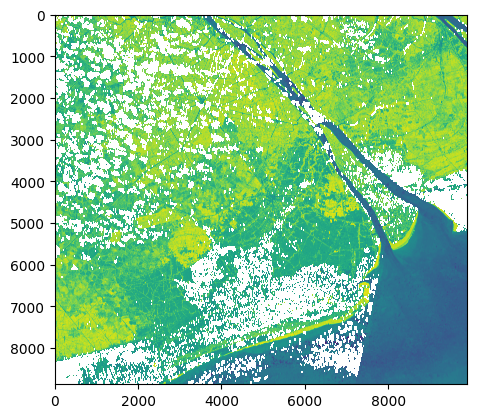

In [11]:
plt.imshow(average_ndvi.isel(time=6), vmin=None, vmax=None)
average_ndvi.shape

SAVE THE DATA FOR TRAINING SERVERAL TIME

In [12]:
np.savez('input/saved_datasets/full_dataset_cloud.npz', ndvi=average_ndvi, vh=average_vh, vv=average_vv)

LOAD SAVED DATASET TO USE

In [2]:
full_dataset = np.load('input/saved_datasets/full_dataset_cloud.npz')

In [3]:
ndvi = full_dataset['nvdi']
vh = full_dataset['vh']
vv = full_dataset['vv']

In [4]:
mask = ~np.isnan(ndvi)
X_train = np.stack([vh[mask], vv[mask]], axis=1)
y_train = ndvi[mask]

In [16]:
# np.savez('datasets/train_dataset/full_data_regressor_train.npz', data=X_train, label=y_train)

In [17]:
num_samples = 2000000

# Generate random indices
random_indices = np.random.choice(X_train.shape[0], size=num_samples, replace=False)

# Subset the data using the random indices
X_train_subset = X_train[random_indices]
y_train_subset = y_train[random_indices]

# Check the new shape
print(X_train_subset.shape)
print(y_train_subset.shape)


(2000000, 2)
(2000000,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

TRAIN MODEL

In [ ]:
%%time
best_model, best_params, best_score, cv_results = find_best_regression(X_train, 
                                                                       y_train, regressors['gradient_boosting'], 
                                                                       param_grids_regressor['gradient_boosting'])

# Print best parameters, best result, and MSE over splits
print(f"Best parameters: {best_params}")
print(f"Best result (negative MSE): {-best_score}")

In [ ]:
folder_path = 'output/regressors/'
file_path = os.path.join(folder_path, 'gb_cloud.pkl')
joblib.dump(best_model, file_path)

In [ ]:
y_pred = best_model.predict(X_test)
# Calculate R² score
r2 = r2_score(y_test, y_pred)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

FILL CLOUD 

In [5]:
best_model = joblib.load("output/regressors/gb_cloud.pkl")

In [6]:
filled_ndvi = np.copy(ndvi)

In [7]:
X_pred = np.stack([vh[~mask], vv[~mask]], axis=1)
filled_ndvi[~mask] = best_model.predict(X_pred)

In [8]:
np.savez('input/saved_datasets/gb_full_dataset_filled.npz', ndvi=filled_ndvi, vv=vv, vh=vh)

In [ ]:
client.close()
cluster.close()